## Импортирование модулей

In [545]:
#Импортируем модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [547]:
%matplotlib inline

### Добавление датасет

In [550]:
df = pd.read_csv('C:\\Users\\rakhm\\Downloads\\Telegram Desktop\\Stars.csv')

In [552]:
# проверяем, что данные загрузились - выводим первые 10 строк таблицы
df.head(10)

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
5,2840,0.000650,0.1100,16.98,0,Brown Dwarf,Red,M
6,2637,0.000730,0.1270,17.22,0,Brown Dwarf,Red,M
7,2600,0.000400,0.0960,17.40,0,Brown Dwarf,Red,M
8,2650,0.000690,0.1100,17.45,0,Brown Dwarf,Red,M
9,2700,0.000180,0.1300,16.05,0,Brown Dwarf,Red,M


## Описание данных

* Temperature (K): Абсолютная температура звезды в кельвинах.
* Luminosity (L/Lo): Относительная luminosity звезды по сравнению с солнечной (Lo = 3.828 × 10^26 Вт).
* Radius (R/Ro): Относительный радиус звезды по сравнению с солнечным (Ro = 6.9551 × 10^8 м).
* Absolute Magnitude (Mv): Абсолютная величина звезды, отражающая её яркость на расстоянии 10 парсеков).
* Star Type: Тип звезды (например, коричневой карлик, красный карлик и т.д.).
* Star Category: Категория звезды, в данном случае все звезды являются коричневыми карликами.
* Цвет звезды (например, красный).
* Спектральный класс звезды (например, M).пример, M).ер, M).

## Разведочный анализ данных (РАД, EDA)На какие вопросы может дать ответы РАД?
- сколько у нас данных? (кол-во объектов и их признаков)
- какие типы данных имеют признаки?
- какой признак является целевым (target)? С какой задачей мы имеем дело? (классификация или регрессия)
- сколько значений пропущено в различных колонках?
- какова статистика распределения значений признаков? Есть ли выбросы (аномальные наблюдения)?
- как признаки соотносятся между собой (коррелируют, влияют друг на друга)? Как признаки влияют на целевой признак?
- для задач классификации: сколько у нас классов - два или больше? Сбалансированы ли классы?
- и др.

В зависимости от формы представления результатов РАД можно разделить на:
- числовой/табличный анализ
- визуальный (графический) анализ

В зависимости от кол-ва одновременно исследуемых признаков РАД можно разделить на:
- одномерный анализ (univariate analysis) - исследование каждого признака в отдельности
- двумерный анализ (bivariate analysis) - исследование взаимного влияния признаков и сравнение их характеристик
- многомерный анализ (multivariate analysis) - сравнение статистических характеристик нескольких признаков , то они несбалансированы.

In [556]:
# объём данных
df.shape

(240, 8)

In [557]:
# типы данных
df.dtypes

Temperature (K)              int64
Luminosity (L/Lo)          float64
Radius (R/Ro)              float64
Absolute magnitude (Mv)    float64
Star type                    int64
Star category               object
Star color                  object
Spectral Class              object
dtype: object

In [558]:
# Целевой признак - "Star type"

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [564]:
## Проверка пропусков в колонках
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке Temperature (K) = 0
Кол-во пропусков в колонке Luminosity (L/Lo) = 0
Кол-во пропусков в колонке Radius (R/Ro) = 0
Кол-во пропусков в колонке Absolute magnitude (Mv) = 0
Кол-во пропусков в колонке Star type = 0
Кол-во пропусков в колонке Star category = 0
Кол-во пропусков в колонке Star color = 0
Кол-во пропусков в колонке Spectral Class = 0


#### Пропусков в колонках не найдено

In [566]:
# Количество пропущенных значений
df.isnull().sum()

Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star color                 0
Spectral Class             0
dtype: int64

#### Пропущенных знечений не найденно

In [570]:
df.dropna(inplace=True)

In [571]:
# Имена колонок в виде списка
df.columns

Index(['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)', 'Star type', 'Star category', 'Star color',
       'Spectral Class'],
      dtype='object')

In [574]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
Luminosity (L/Lo),240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
Radius (R/Ro),240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
Absolute magnitude (Mv),240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Star type,240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


#### Нахождение уникальных значений

In [577]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Количество уникальных значений в '{column}': {len(unique_values)}")

Количество уникальных значений в 'Temperature (K)': 228
Количество уникальных значений в 'Luminosity (L/Lo)': 208
Количество уникальных значений в 'Radius (R/Ro)': 216
Количество уникальных значений в 'Absolute magnitude (Mv)': 228
Количество уникальных значений в 'Star type': 6
Количество уникальных значений в 'Star category': 6
Количество уникальных значений в 'Star color': 19
Количество уникальных значений в 'Spectral Class': 7


#### Редактирование данных

In [580]:
star_color_mapping = {
    'Red': 1, 'Blue': 2, 'Blue-white': 3, 'Yellow-white': 4, 'White': 5,
    'Orange': 6, 'Yellowish White': 7, 'Brown Dwarf': 8
}

In [582]:
spectral_class_mapping = {
    'O': 1, 'B': 2, 'A': 3, 'F': 4, 'G': 5, 'K': 6, 'M': 7
}

In [584]:
df['Spectral Class'] = df['Spectral Class'].map(spectral_class_mapping)
df['Star color'] = df['Star color'].map(star_color_mapping)

In [586]:
spectral_class_mapping = {
    'Brown Dwarf': 1,
    'Red Dwarf': 2,
    'White Dwarf': 3,
    'Main Sequence': 4,
    'Supergiant': 5,
    'Hypergiant': 6,
    
}
df['Star category'] = df['Star category'].map(spectral_class_mapping)

#### Проверка изменения данных

In [589]:
df

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,1,1.0,7
1,3042,0.000500,0.1542,16.60,0,1,1.0,7
2,2600,0.000300,0.1020,18.70,0,1,1.0,7
3,2800,0.000200,0.1600,16.65,0,1,1.0,7
4,1939,0.000138,0.1030,20.06,0,1,1.0,7
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,6,2.0,1
236,30839,834042.000000,1194.0000,-10.63,5,6,2.0,1
237,8829,537493.000000,1423.0000,-10.73,5,6,5.0,3
238,9235,404940.000000,1112.0000,-11.23,5,6,5.0,3


In [591]:
# Целевой признак - "Star type"
y = df['Star type']
X = df.drop(['Star type'], axis=1)

## Визуальный анализ

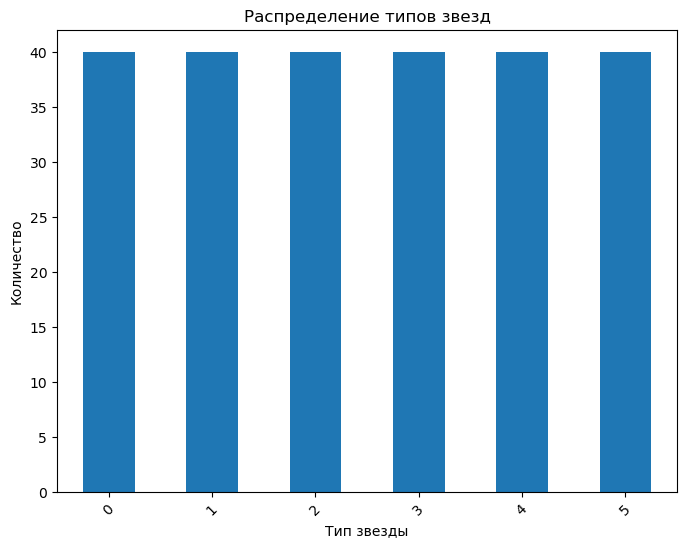

In [594]:
plt.figure(figsize=(8, 6))
df['Star type'].value_counts(normalize=False).plot.bar()
plt.title('Распределение типов звезд')
plt.xlabel('Тип звезды')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

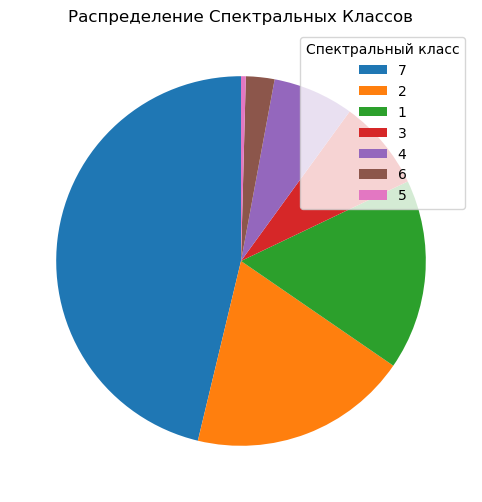

In [595]:
plt.figure(figsize=(8, 6))
df['Spectral Class'].value_counts(normalize=True).plot.pie(startangle=90,labels=None)
plt.title('Распределение Спектральных Классов')
plt.legend(df['Spectral Class'].value_counts().index, title='Спектральный класс', loc='upper right')
plt.ylabel('')
plt.show()

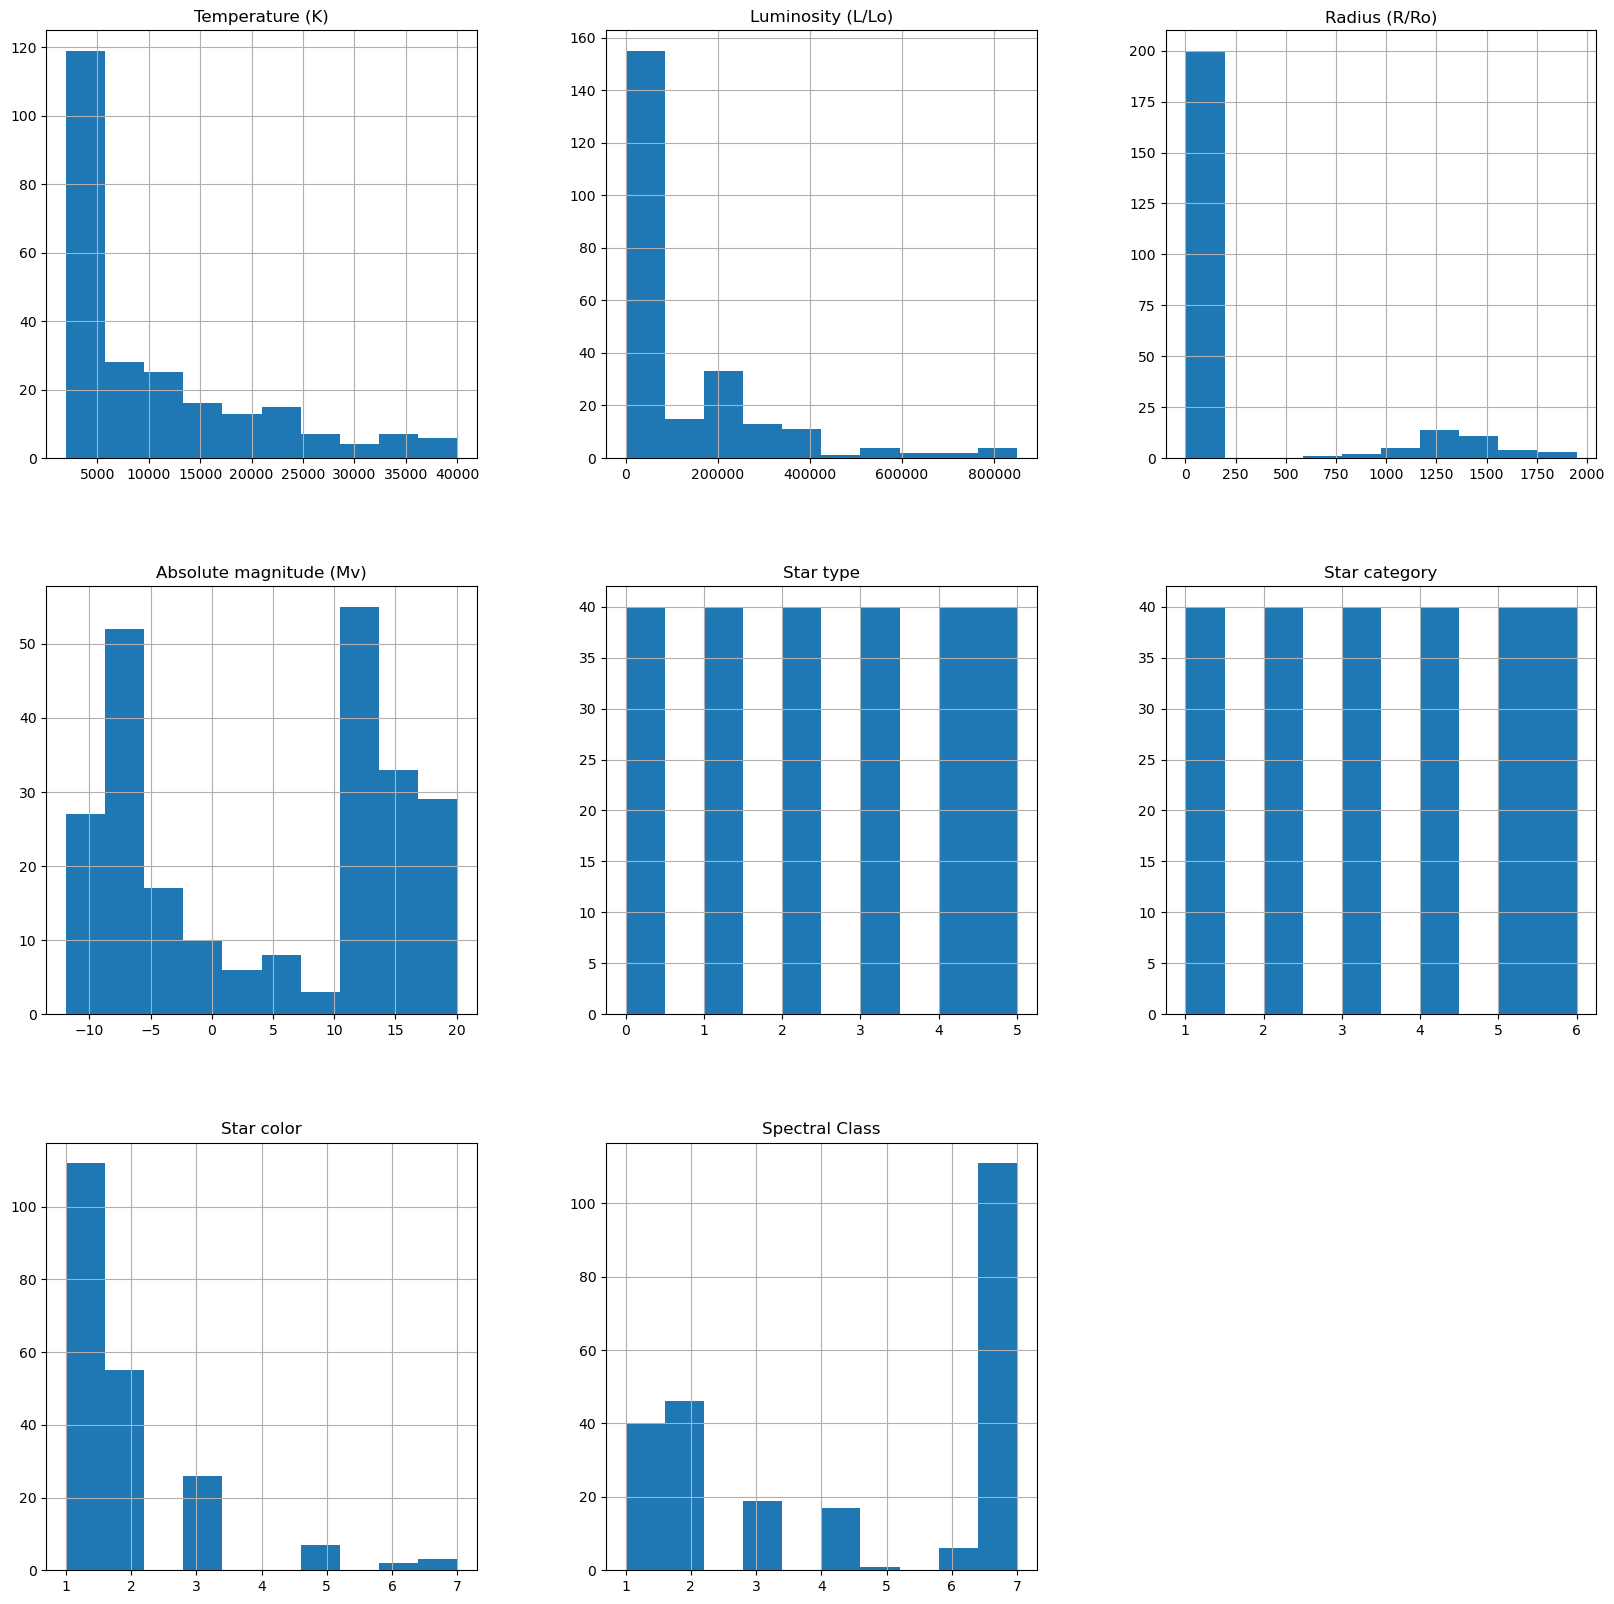

In [596]:
# гистаграммы всех признаков
df.hist(figsize=(20,20));

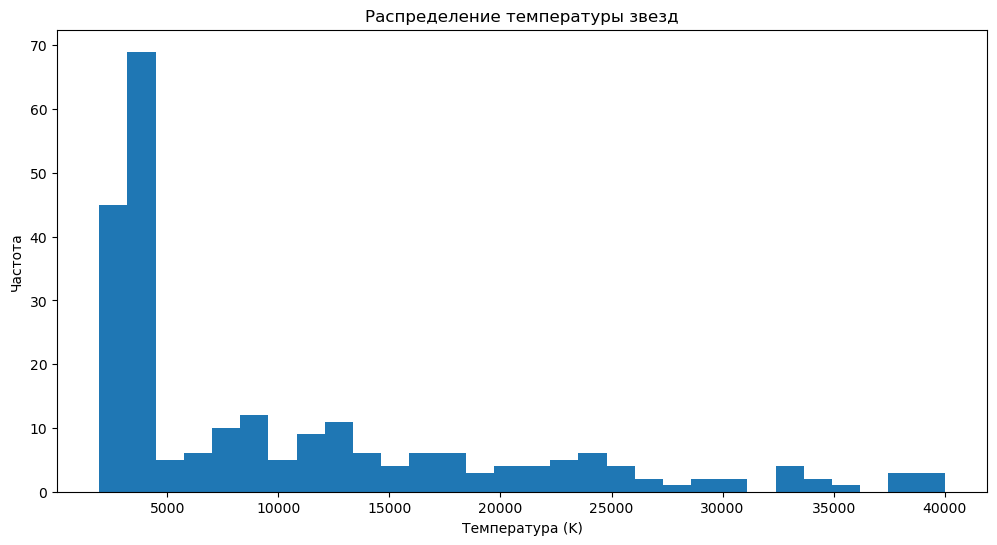

In [597]:
plt.figure(figsize=(12, 6))
df['Temperature (K)'].hist(bins=30)
plt.title('Распределение температуры звезд')
plt.xlabel('Температура (K)')
plt.ylabel('Частота')
plt.grid(False)
plt.show()

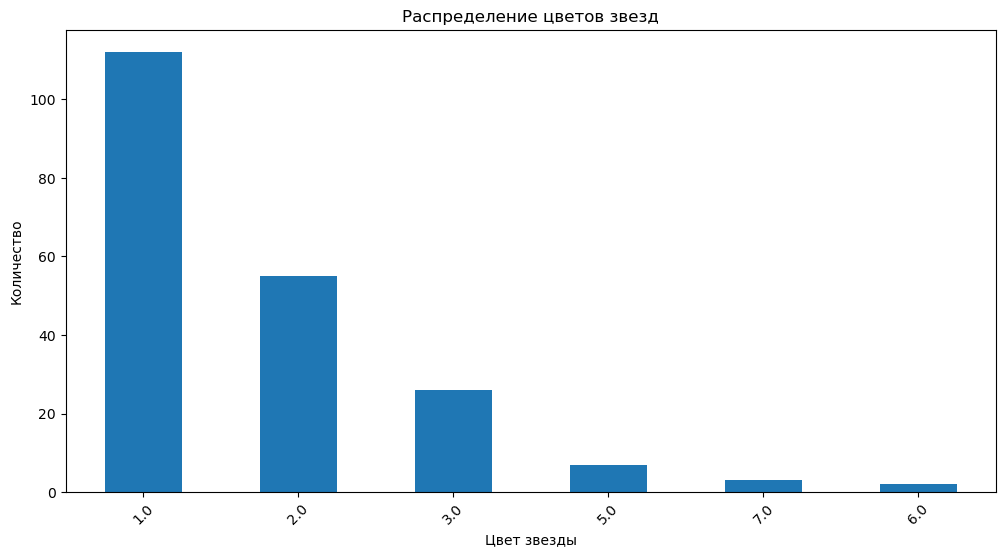

In [598]:
plt.figure(figsize=(12, 6))
df['Star color'].value_counts().plot.bar()
plt.title('Распределение цветов звезд')
plt.xlabel('Цвет звезды')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

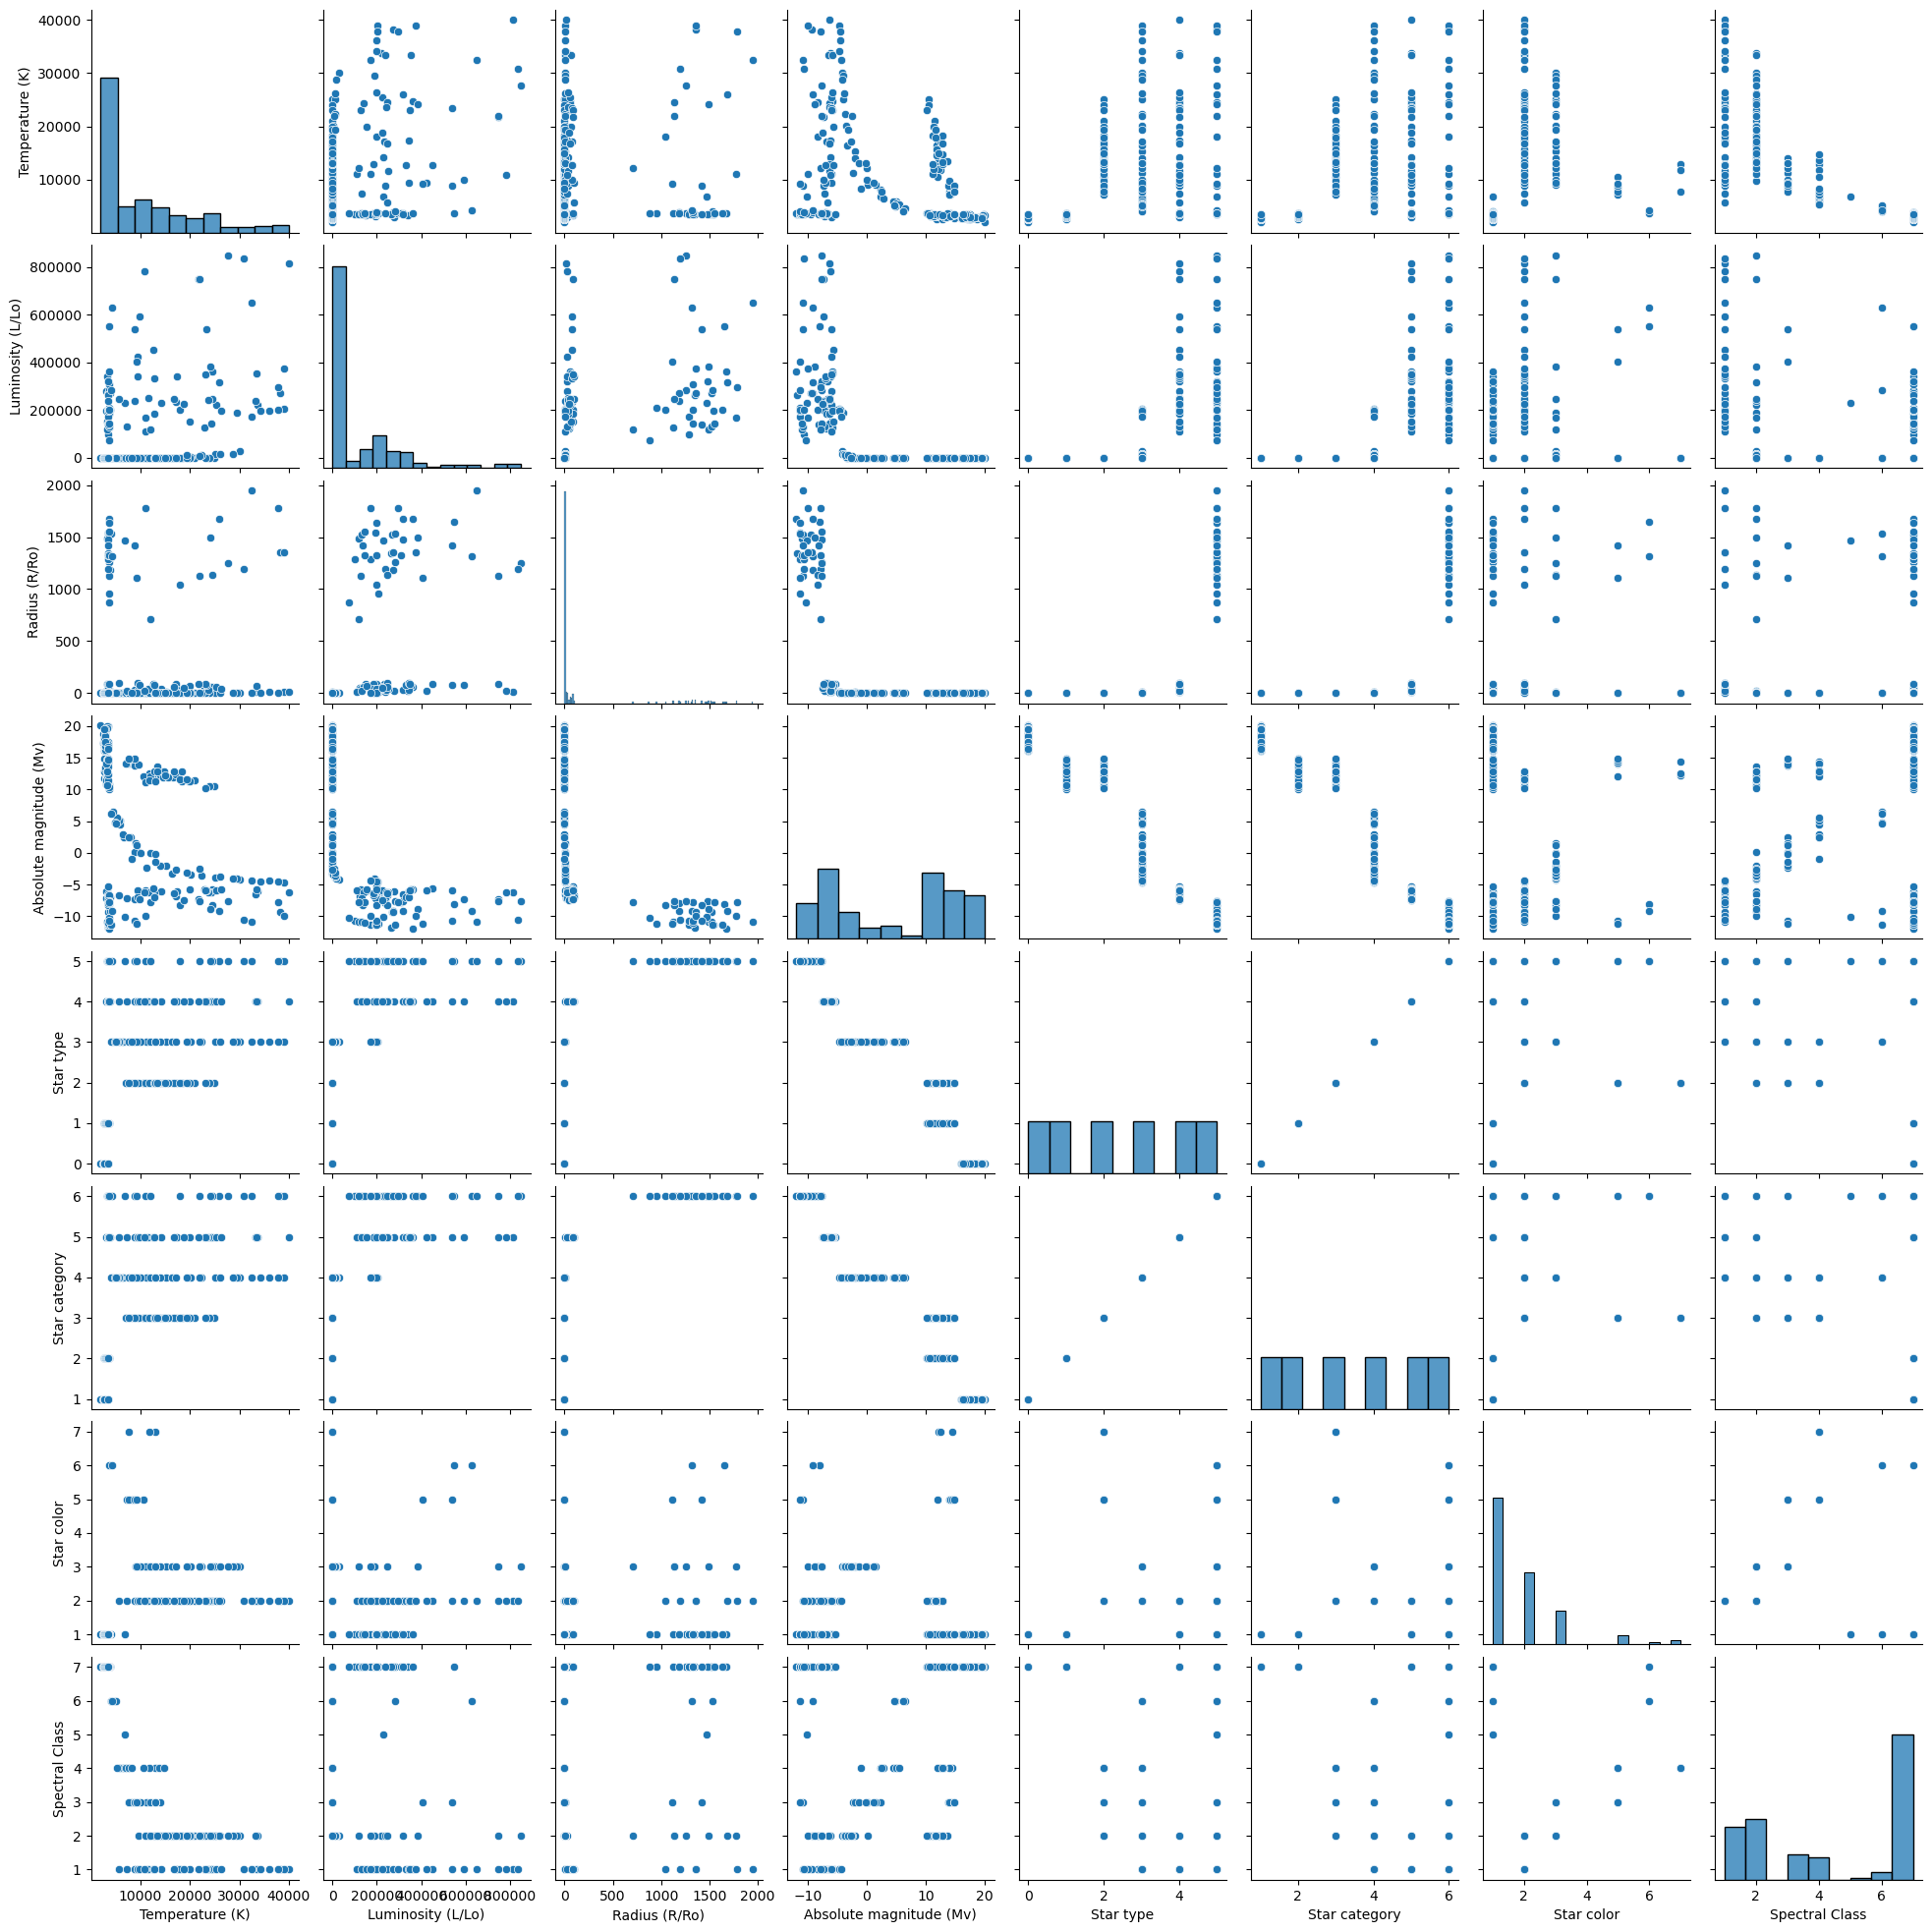

In [599]:
sns.pairplot(df)

 ## Двумерный анализ

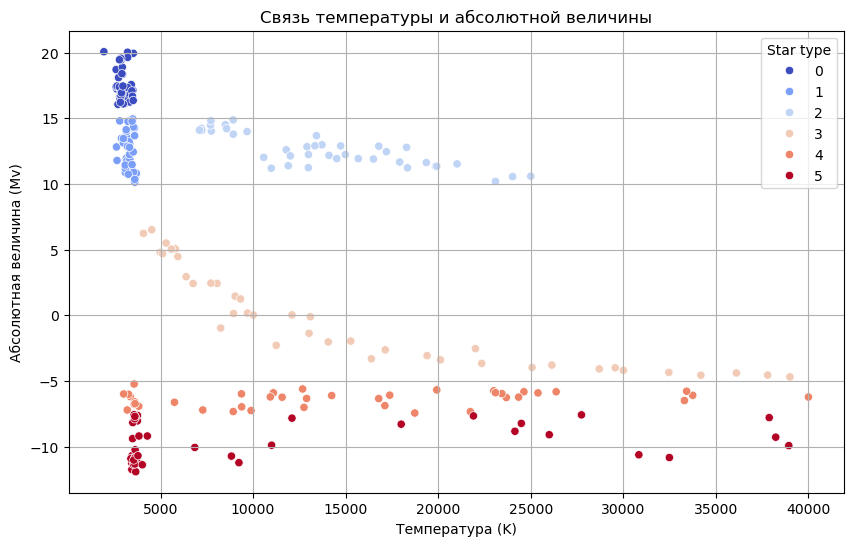

In [602]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature (K)', y='Absolute magnitude (Mv)', hue='Star type', palette='coolwarm')
plt.title('Связь температуры и абсолютной величины')
plt.xlabel('Температура (K)')
plt.ylabel('Абсолютная величина (Mv)')
plt.grid(True)
plt.show()

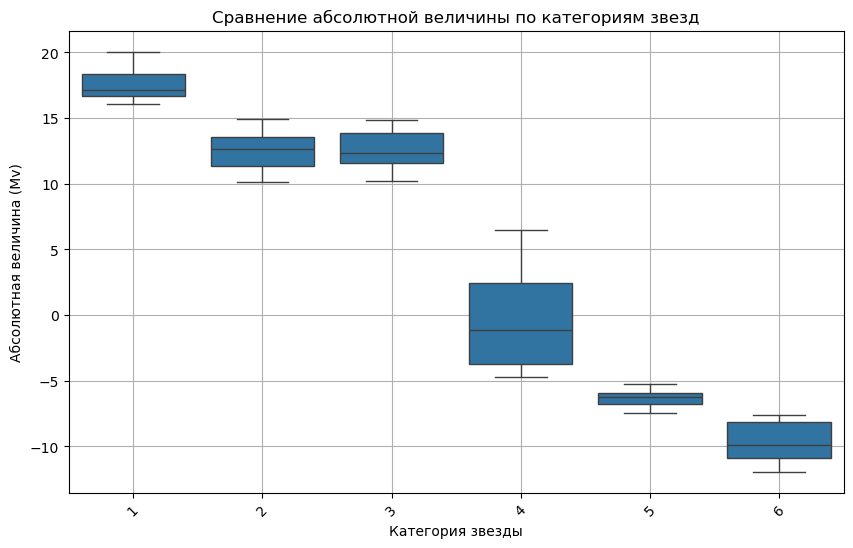

In [603]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Star category', y='Absolute magnitude (Mv)')
plt.title('Сравнение абсолютной величины по категориям звезд')
plt.xlabel('Категория звезды')
plt.ylabel('Абсолютная величина (Mv)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

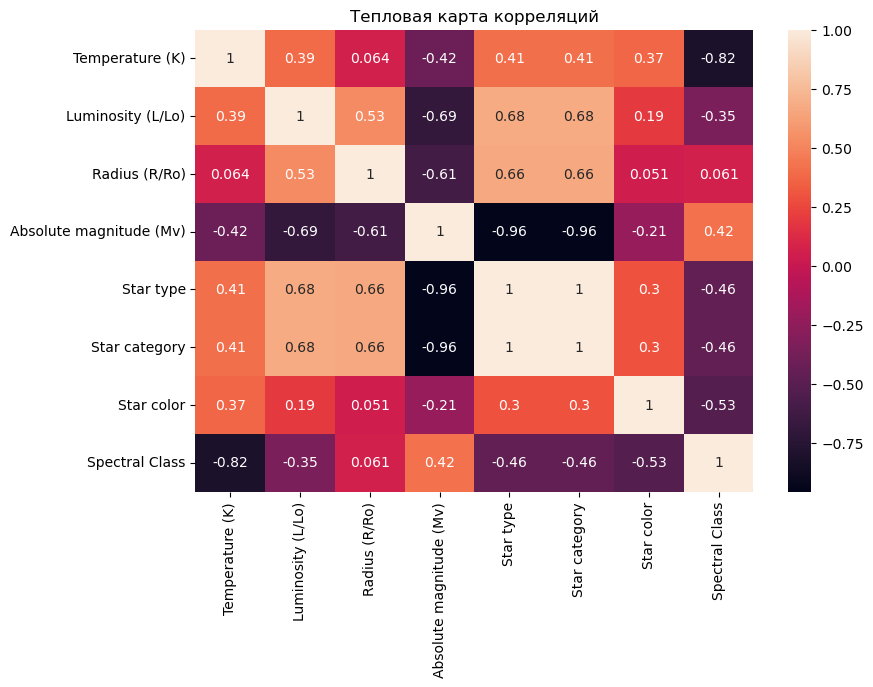

In [605]:
plt.figure(figsize=(9, 6))
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Тепловая карта корреляций')
plt.show()

## Формирование дата-сета для обучения моделей

In [607]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

df.dropna(inplace=True)

y = df['Star type']
X = df.drop(['Star type', 'Star category'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [608]:
# Проверим на NaN.
print("Пропущенные значения в данных перед обучение:")
print(pd.DataFrame(X_train_scaled).isnull().sum())

Пропущенные значения в данных перед обучение:
0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


In [609]:
from sklearn.impute import SimpleImputer 

In [610]:
if X.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [611]:
X.head()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,1.0,7
1,3042,0.000500,0.1542,16.60,1.0,7
2,2600,0.000300,0.1020,18.70,1.0,7
3,2800,0.000200,0.1600,16.65,1.0,7
4,1939,0.000138,0.1030,20.06,1.0,7


In [612]:
df.dropna(inplace = True)

In [613]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

In [614]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(137, 6) (68, 6) (137,) (68,)


In [615]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [616]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [617]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [618]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## KNeighborsClassifier (Классификация ближайших соседей)

In [675]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [677]:
knn.predict(X_test)

C:\Users\rakhm\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([5, 3, 3, 5, 5, 3, 5, 5, 3, 3, 5, 5, 3, 3, 5, 3, 3, 5, 5, 3, 3, 3,
       3, 3, 3, 5, 3, 5, 3, 3, 5, 3, 5, 3, 5, 5, 5, 5, 3, 3, 3, 5, 3, 3,
       3, 3, 5, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 3, 3, 3, 5, 3, 5, 5, 3,
       3, 3], dtype=int64)

In [679]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       1.00      0.67      0.80         9
           4       0.81      1.00      0.90        13
           5       1.00      1.00      1.00        13

    accuracy                           0.96        68
   macro avg       0.97      0.94      0.95        68
weighted avg       0.96      0.96      0.95        68



In [681]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knn_pred)

0.9558823529411765

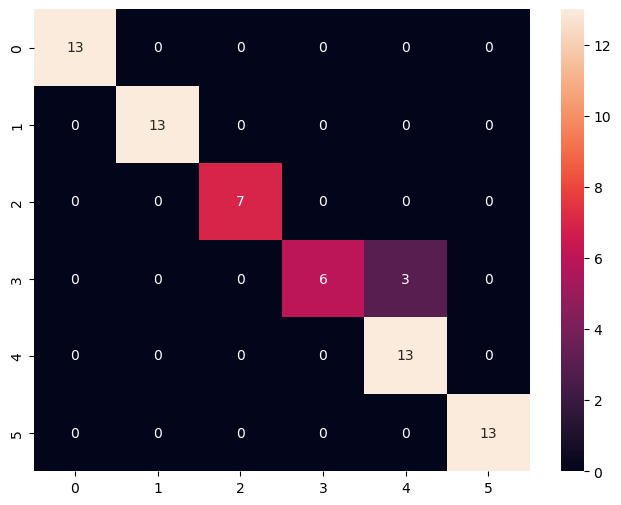

In [683]:
knn_pred = knn.predict(X_test_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.show()

#### Вывод KNeighborsClassifier
**Результаты тестирования показали, что модель хорошо справляется с различными типами звезд, с правильными предсказаниями по большинству классов.**

## Gaussian Naive Bayes

In [687]:
from sklearn.naive_bayes import GaussianNB

In [689]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 0 ns
Wall time: 2 ms


GaussianNB()

In [632]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([5, 1, 0, 3, 3, 1, 5, 5, 3, 3, 4, 5, 3, 1, 5, 1, 0, 5, 4, 0],
      dtype=int64)

array([5, 1, 0, 3, 3, 1, 5, 5, 3, 3, 4, 5, 3, 1, 5, 0, 0, 5, 4, 0],
      dtype=int64)

In [693]:
print(classification_report(y_test, gnb_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.69      0.85      0.76        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        13

    accuracy                           0.90        68
   macro avg       0.91      0.91      0.91        68
weighted avg       0.90      0.90      0.90        68



In [695]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

0.8970588235294118

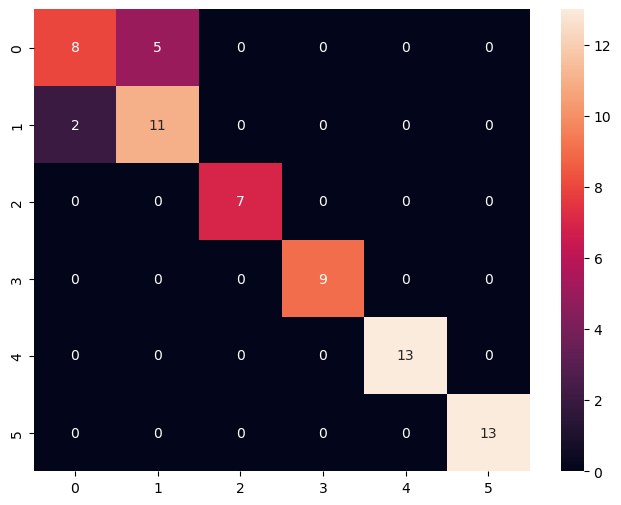

In [699]:
#rfc_pred = rfc.predict(X_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, gnb_pred_test), annot=True, fmt='d',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.show()

#### Вывод Gaussian Naive Bayes
**Эта модель обеспечивает стабильные результаты для всех классов.**

## Random Forest Classifier

In [749]:
rfc = RandomForestClassifier()
rfc.fit(X, y)

RandomForestClassifier()

In [751]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([5, 1, 0, 3, 3, 1, 5, 5, 3, 3, 4, 5, 3, 1, 5, 0, 0, 5, 4, 0],
      dtype=int64)

array([5, 1, 0, 3, 3, 1, 5, 5, 3, 3, 4, 5, 3, 1, 5, 0, 0, 5, 4, 0],
      dtype=int64)

In [753]:
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        13

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



In [755]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rfc_pred_test)

1.0

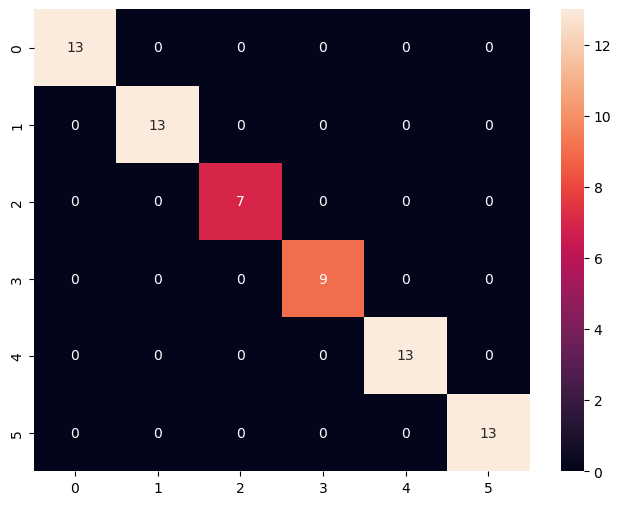

In [757]:
rfc_pred = rfc.predict(X_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rfc_pred_test), annot=True, fmt='d',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.show()

#### Вывод Random Forest Classifier
**Модель продемонстрировала высокую точность в предсказании различных типов звезд.**

## Общий вывод по проделанной работе

* В ходе разбора датасета были достигнуты значительные результаты в анализе и моделировании данных о звёздах. 
* После загрузки и обработки данных был проведён разведочный анализ, который углубил понимание характеристик звёзд.
* Визуализация данных на графиках и диаграммах продемонстрировала распределение типов звёзд. 
* Создание моделей классификации обеспечило высокую точность предсказаний